# Lab15

## 0. Prerequisite

In [ ]:
!pip install mypy
from IPython.core.magic import register_cell_magic
from IPython import get_ipython
from mypy import api


@register_cell_magic
def mypy(line, cell):
    for output in api.run(['-c', '\n' + cell] + line.split()):
        if output and not output.startswith('Success'):
            raise TypeError(output)
    get_ipython().run_cell(cell)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 9.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## matplotlib

<a href="https://matplotlib.org/stable/tutorials/introductory/quick_start.html#quick-start-guide">Quick Start Guide</a>



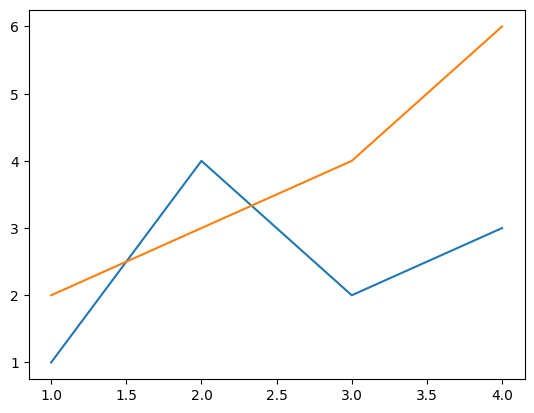

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()  # Create a figure containing a single axes.
x = [1, 2, 3, 4]
y = list(zip([1, 4, 2, 3], [2, 3, 4, 6]))
ax.plot(x, y)  # Plot some data on the axes.

## Creating a Figure and Axes


<img src="https://matplotlib.org/stable/_images/anatomy.png"/>






## Figure

The whole figure. 

The Figure keeps track of 

* all the child Axes (축), 
* a group of 'special' Artists (titles, figure legends, colorbars, etc), and 
* even nested subfigures.

<Figure size 640x480 with 0 Axes>

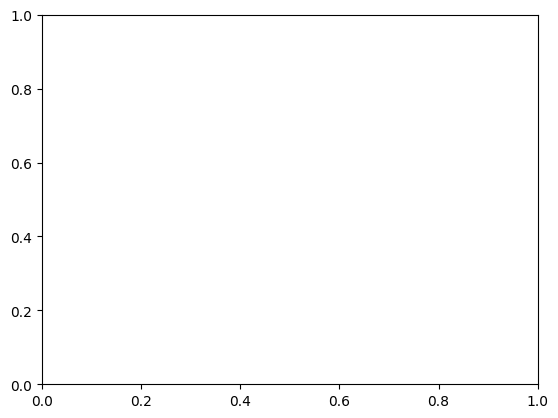

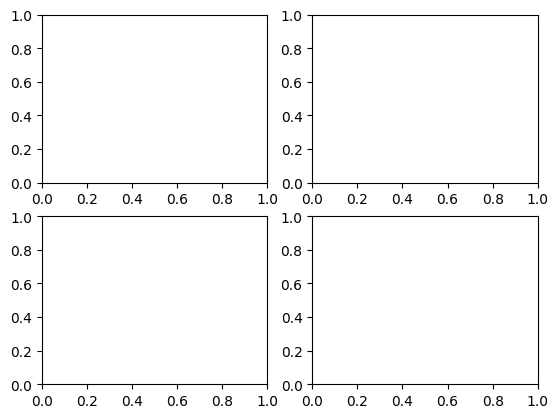

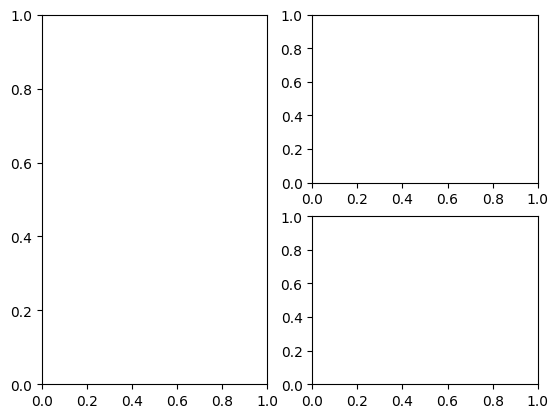

In [ ]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
# a figure with one axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['left', 'right-top'],
                               ['left', 'right_bottom']])
plt.show()

## Axes (클래스, 엑시즈)

The Axes class represents one (sub-)plot in a figure. 

It contains 

* the plotted data, 
* axis ticks, 
* labels, 
* title, 
* legend, etc. 

Its methods are the main interface for manipulating the plot.

An Axes is an Artist attached to a Figure that contains 

* a region for plotting data, and 
* usually includes two Axis (x축, y축, 엑시스) objects.

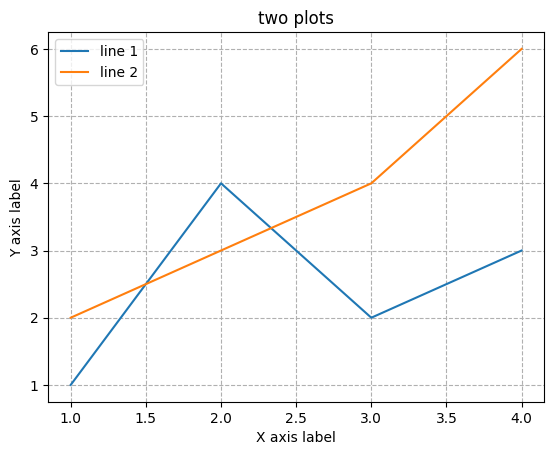

In [ ]:
x = [1, 2, 3, 4]
y = list(zip([1, 4, 2, 3], [2, 3, 4, 6]))

y1 = [1, 4, 2, 3]
y2 = [2, 3, 4, 6]

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
fig, ax = plt.subplots()  # Create a figure containing a single axes.

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
ax.plot(x, y1, label='line 1')  # Plot some data on the axes.
ax.plot(x, y2, label='line 2')  # Plot some data on the axes.

ax.set_xlabel('X axis label')
ax.set_ylabel('Y axis label')
ax.set_title('two plots')

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
ax.legend(loc='upper left')

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html
ax.grid(linestyle='--')
plt.show()  # the current figure is displayed and then emptied

## Axis

These objects 

* set the scale and 
* limits and 
* generate ticks (the marks on the Axis) and 
* ticklabels (strings labeling the ticks).

Each Axis has a tick locator and formatter

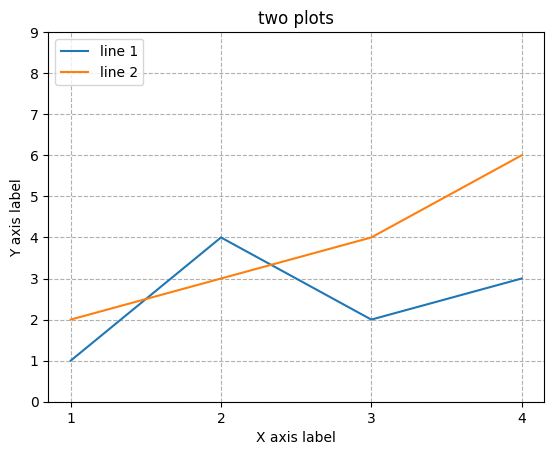

In [ ]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html
ax.set_xticks(np.arange(min(x), max(x) + 1, 1))
ax.set_yticks(np.arange(0, 10, 1))

#fig.show()
display(fig)

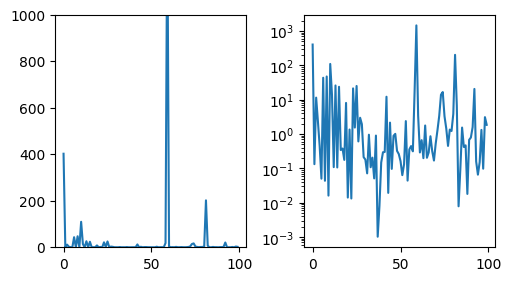

In [ ]:
data1, data2, data3, data4 = np.random.randn(4, 100)
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10 ** data1

fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout='constrained')
axs[0].plot(xdata, data)

# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylim.html
axs[0].set_ylim(0, 10 ** 3)

# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_yscale.html
axs[1].set_yscale('log')
axs[1].plot(xdata, data)
plt.show()

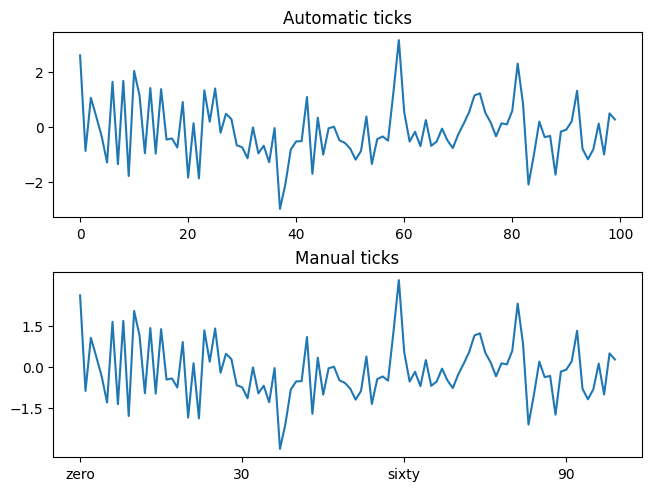

In [ ]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html
axs[1].set_xticks(ticks=np.arange(0, 100, 30), labels=['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks')
plt.show()

<img src="https://matplotlib.org/stable/_images/sphx_glr_tick-locators_001_2_0x.png"/>

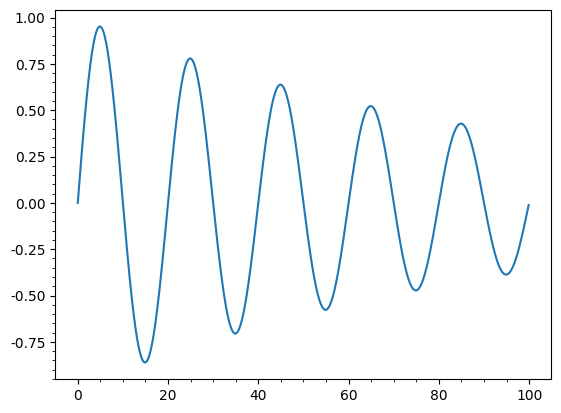

In [ ]:
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

t = np.arange(0.0, 100.0, 0.1)
s = np.sin(0.1 * np.pi * t) * np.exp(-t * 0.01)

fig, ax = plt.subplots()
ax.plot(t, s)

# https://matplotlib.org/stable/api/ticker_api.html
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_major_formatter('{x:.0f}')

# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(5))

# https://matplotlib.org/stable/gallery/ticks/tick-locators.html#tick-locators
ax.yaxis.set_major_locator(MultipleLocator(0.25))
ax.yaxis.set_major_formatter('{x:.2f}')
ax.yaxis.set_minor_locator(MultipleLocator(0.05))

plt.show()

## Artists

Basically, everything visible on the Figure is an Artist (even Figure, Axes, and Axis objects). 

### Format Strings
fmt = '[marker][line][color]'


### marker
* '.' point marker
* ',' pixel marker
* 'o' circle marker

https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html#marker-reference

### line

* '-' solid line style
* '--' dashed line style
* '-.' dash-dot line style
* ':' dotted line style

https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html#linestyles

### color
* 'b' blue
* 'g' green
* 'r' red

https://matplotlib.org/stable/gallery/color/named_colors.html#list-of-named-colors

<class 'list'> 1


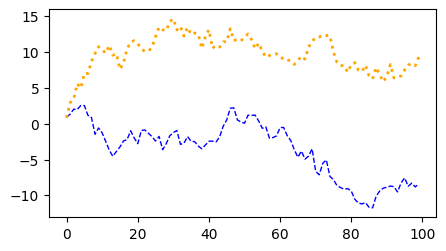

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=1, linestyle='--')

lst = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
print(type(lst), len(lst))

lst[0].set_linestyle(':')
plt.show()

## OO-style

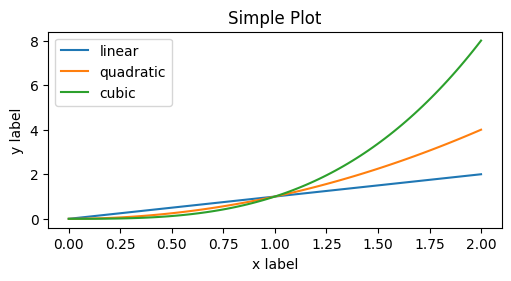

In [ ]:
# Explicitly create Figures and Axes, and call methods on them (the "object-oriented (OO) style").

x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x ** 2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x ** 3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.
plt.show()

## pyplot-style

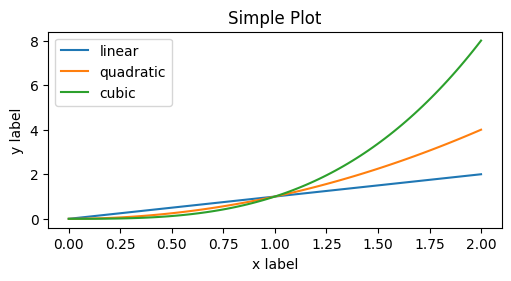

In [ ]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x ** 2, label='quadratic')  # etc.
plt.plot(x, x ** 3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()
plt.show()

## Making a helper functions

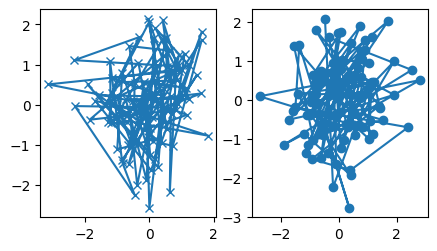

In [ ]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out


data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})
plt.show()

## Plotting with categorical variables

https://matplotlib.org/stable/tutorials/introductory/pyplot.html#plotting-with-categorical-variables


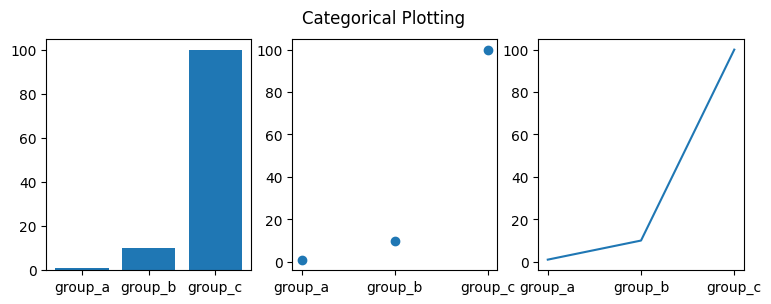

In [ ]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

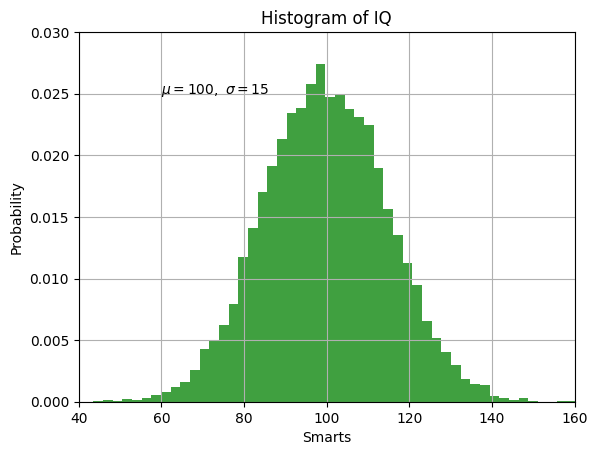

In [ ]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

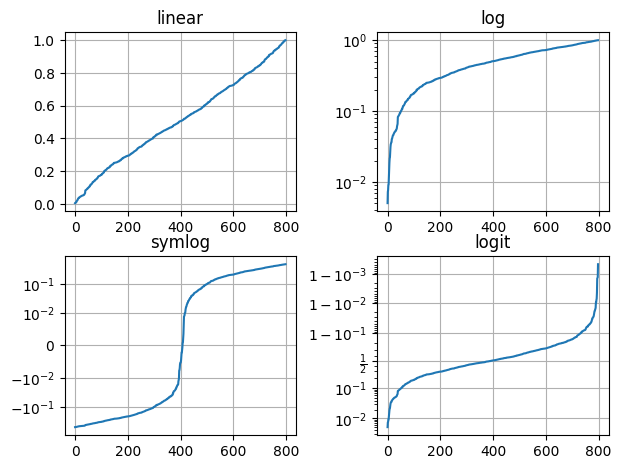

In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

# Lab 16

1. Create a line plot displaying the growth of a plant over time. The height of the plant (in centimeters) and the time (in days) are given as two lists.

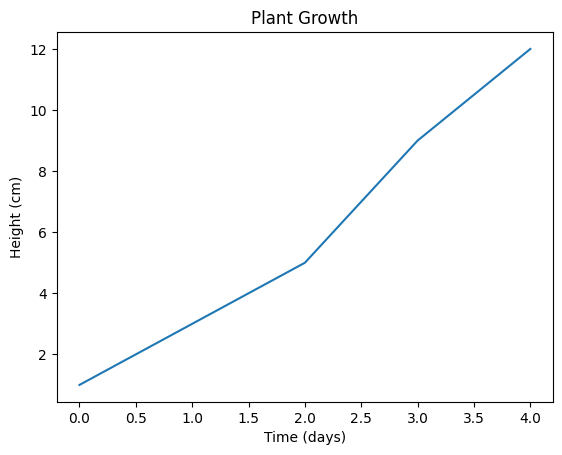

In [3]:
import matplotlib.pyplot as plt
import numpy as np


def plot_growth(height, time):
    fig, ax = plt.subplots()
    ax.plot(time, height)
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Height (cm)')
    ax.set_title('Plant Growth')
    plt.show()


height = np.array([1, 3, 5, 9, 12])
time = np.array([0, 1, 2, 3, 4])
plot_growth(height, time)

2. Create a scatter plot showing the relationship between the number of hours studied and exam scores. You are given two lists: hours studied and corresponding exam scores.

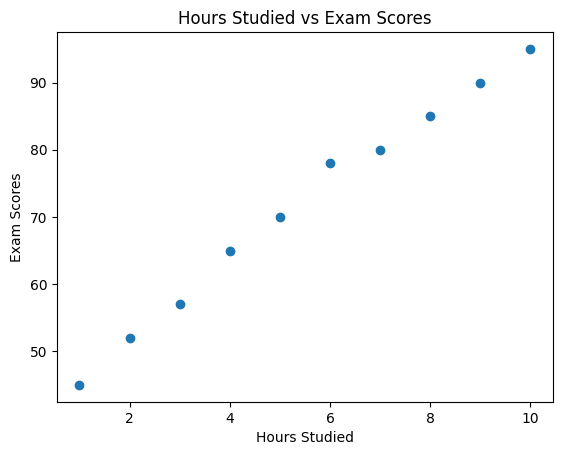

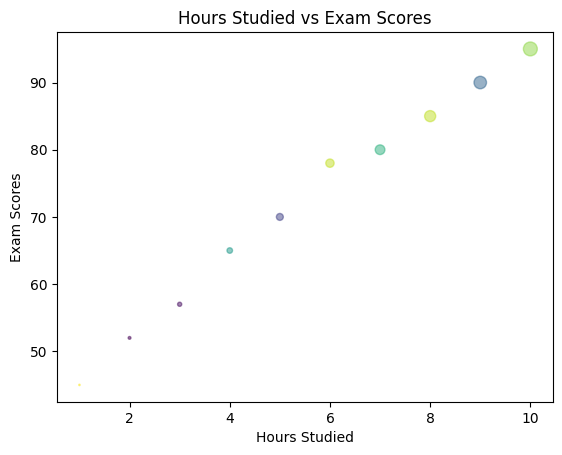

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_scores(hours, scores):
    fig, ax = plt.subplots()
    ax.scatter(hours, scores)
    ax.set_xlabel('Hours Studied')
    ax.set_ylabel('Exam Scores')
    ax.set_title('Hours Studied vs Exam Scores')
    plt.show()


def plot_scores2(hours, scores):
    fig, ax = plt.subplots()
    x = np.array(np.arange(min(hours), max(hours) + 1, 1))
    N = len(x)
    colors = np.random.rand(N)
    area = hours ** 2
    ax.scatter(hours, scores, s=area, c=colors, alpha=0.5)
    ax.set_xlabel('Hours Studied')
    ax.set_ylabel('Exam Scores')
    ax.set_title('Hours Studied vs Exam Scores')
    plt.show()


hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
scores = np.array([45, 52, 57, 65, 70, 78, 80, 85, 90, 95])
plot_scores(hours, scores)
plot_scores2(hours, scores)

3. Create a pie chart showing the popularity of different courses. You are given a list of course names and their corresponding number of enrollments.

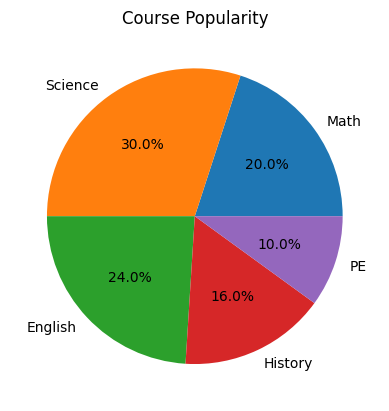

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_popularity(courses, enrollments):
    fig, ax = plt.subplots()
    ax.pie(enrollments, labels=courses, autopct='%.1f%%')
    ax.set_title('Course Popularity')
    plt.show()


courses = ['Math', 'Science', 'English', 'History', 'PE']
enrollments = np.array([100, 150, 120, 80, 50])
plot_popularity(courses, enrollments)

4. Create a histogram showing the distribution of ages in a dataset. You are given a list of ages.

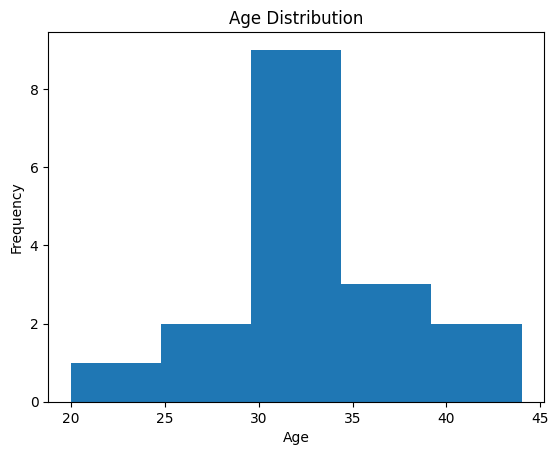

In [10]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

HIST_BINS = np.linspace(20, 50, 5)

def prepare_animation(bar_container, data):
    def animate(frame_number):
        n, _ = np.histogram(data, HIST_BINS)
        for count, rect in zip(n, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches

def plot_age_distribution(ages):
    fig, ax = plt.subplots()
    _, _, bar_container = ax.hist(ages, bins=5)
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
    ax.set_title('Age Distribution')
    # ani = animation.FuncAnimation(fig, prepare_animation(bar_container, ages), 50, repeat=True, blit=True)
    plt.show()


ages = np.array([20, 31, 32, 33, 28, 29, 30, 31, 32, 33, 34, 35, 37, 39, 32, 43, 44])
plot_age_distribution(ages)

5. Create a bar plot displaying the population of different countries. You are given a list of country names and their corresponding population.


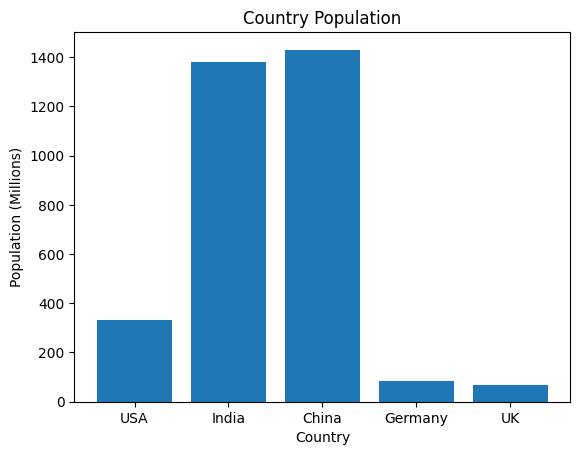

In [11]:
import matplotlib.pyplot as plt
import numpy as np


def plot_population(countries, population):
    fig, ax = plt.subplots()
    ax.bar(countries, population)
    ax.set_xlabel('Country')
    ax.set_ylabel('Population (Millions)')
    ax.set_title('Country Population')
    plt.show()


countries = ['USA', 'India', 'China', 'Germany', 'UK']
population = np.array([330, 1380, 1430, 83, 67])
plot_population(countries, population)

6. Create a line plot displaying the daily closing stock prices for a company. You are given a list of dates and the corresponding closing stock prices.

https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html

* DateFormatter
* DayLocator



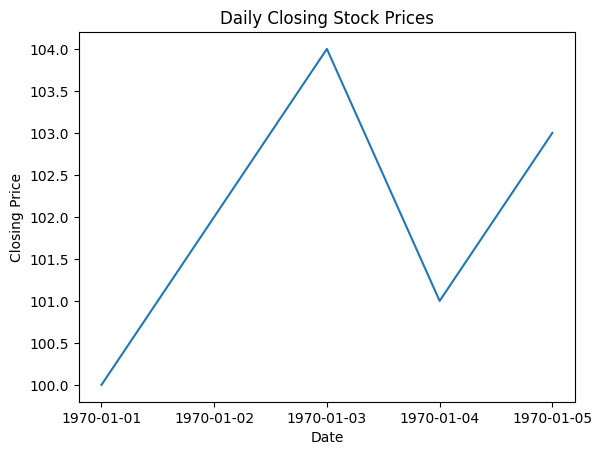

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


def plot_stock_prices(dates, prices):
    fig, ax = plt.subplots()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.DayLocator())
    ax.plot(dates, prices)
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price')
    ax.set_title('Daily Closing Stock Prices')
    ax.set_xticks(ticks=dates, labels=dates, rotation=45)
    plt.show()

dates = ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05']
prices = np.array([100, 102, 104, 101, 103])
plot_stock_prices(dates, prices)

7. Create a box plot comparing the performance of students in three different.

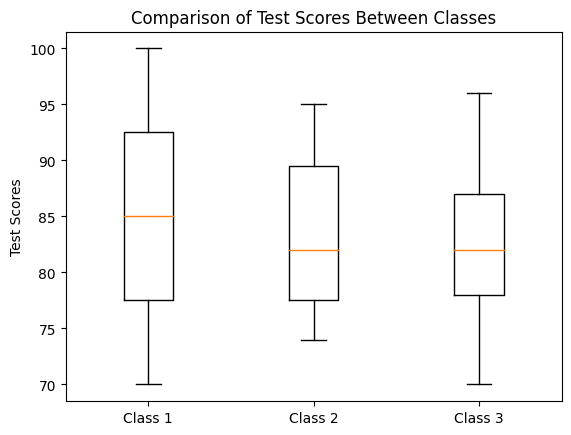

In [14]:
import matplotlib.pyplot as plt


def plot_box(scores1, scores2, scores3):
    data = [scores1, scores2, scores3]
    labels = ['Class 1', 'Class 2', 'Class 3']
    fig, ax = plt.subplots()
    ax.boxplot(data, labels=labels)
    ax.set_ylabel('Test Scores')
    ax.set_title('Comparison of Test Scores Between Classes')
    plt.show()


scores1 = np.array([90, 85, 75, 80, 95, 100, 70])
scores2 = np.array([88, 82, 77, 78, 91, 95, 74])
scores3 = np.array([85, 81, 75, 82, 89, 96, 70])
plot_box(scores1, scores2, scores3)